<a href="https://colab.research.google.com/github/Yanina-Kutovaya/AutoML/blob/main/notebooks/AutoML_Alex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mercedes-Benz Greener Manufacturing
## Optimize R2

https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing

https://github.com/Alex-Lekov/AutoML_Alex

In [2]:
#!pip install automl-alex

In [3]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import time

import automl_alex
from automl_alex import DataPrepare, LightGBM

print(automl_alex.__version__)

1.6.10


## 1. Data ingestion

In [4]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c mercedes-benz-greener-manufacturing
!unzip mercedes-benz-greener-manufacturing.zip

  0% 0.00/343k [00:00<?, ?B/s]
100% 343k/343k [00:00<00:00, 110MB/s]
Archive:  mercedes-benz-greener-manufacturing.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [5]:
train = pd.read_csv('train.csv.zip', index_col='ID')
test = pd.read_csv('test.csv.zip', index_col='ID')
sample_submission = pd.read_csv('sample_submission.csv.zip')

In [6]:
print(f'train.shape = {train.shape}\n')
train.head(2)

train.shape = (4209, 377)



,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
print(f'test.shape = {test.shape}\n')
test.head(2)

test.shape = (4209, 376)



,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
print(f'sample_submission.shape = {sample_submission.shape}\n')
sample_submission.head(2)

sample_submission.shape = (4209, 2)



,ID,y
0,1,100.669318
1,2,100.669318


## 2. Train valid split

In [9]:
RANDOM_SEED = 42

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop('y', axis=1), train['y'], test_size=0.2, random_state=RANDOM_SEED,
)
X_train.shape, X_valid.shape

((3367, 376), (842, 376))

In [11]:
X_train.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
2011,m,v,as,c,d,ag,k,x,0,0,...,0,0,1,0,0,0,0,0,0,0
3690,n,s,as,d,d,ae,g,s,0,0,...,1,0,0,0,0,0,0,0,0,0


## 3. Data preprocessing

In [12]:
de = DataPrepare(
    normalization=False, # for Linar based models -> True
    random_state=RANDOM_SEED,
    )
X_train = de.fit_transform(X_train)
X_valid = de.transform(X_valid)
X_train.shape, X_valid.shape

12:29:40 | Source data shape: (3367, 376)
12:29:40 | ##################################################
12:29:40 | ! START preprocessing Data
12:29:41 | - Auto detect cat features: 6
12:29:41 | > Binary Features
12:29:41 | > Clean Categorical Features
12:29:41 | > Transform Categorical Features.


12:29:41 |  - Encoder: HelmertEncoder ADD features: 98
12:29:41 |  - Encoder: CountEncoder ADD features: 6
12:29:41 |   No nans features
12:29:41 | > CleanOutliers
12:29:41 | ##################################################
12:29:41 | Final data shape: (3367, 467)
12:29:41 | Total ADD columns: 91
12:29:41 | Time fit data_preproc: 0.74 sec
12:29:41 | ##################################################
12:29:41 | ##################################################
12:29:41 | ! Start Transform Data
12:29:41 | > Clean Binary Features
12:29:41 | > Clean Categorical Features
12:29:41 | > Transform Categorical Features.
12:29:41 |  - Encoder: HelmertEncoder ADD features: 98
12:29:41 |  - Encoder: CountEncoder ADD features: 6
12:29:41 | ##################################################
12:29:41 | Final data shape: (842, 467)
12:29:41 | Total ADD columns: 91
12:29:41 | ##################################################


((3367, 467), (842, 467))

In [13]:
X_train.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,HelmertEncoder_X8_20,HelmertEncoder_X8_21,HelmertEncoder_X8_22,HelmertEncoder_X8_23,CountEncoder_X1,CountEncoder_X3,CountEncoder_X4,CountEncoder_X5,CountEncoder_X6,CountEncoder_X8
0,1,1,1,1,1,1,1,1,0,0,...,-1.0,-1.0,-1.0,-1.0,317,1541,3363,168,33,88
1,2,2,1,2,1,2,2,2,0,0,...,-1.0,-1.0,-1.0,-1.0,470,229,3363,157,837,206


## 4. Model

In [14]:
# Currently available libraries:
automl_alex.models.all_models

{'LightGBM': automl_alex.models.model_lightgbm.LightGBM,
 'KNeighbors': automl_alex.models.sklearn_models.KNeighbors,
 'LinearModel': automl_alex.models.sklearn_models.LinearModel,
 'RandomForest': automl_alex.models.sklearn_models.RandomForest,
 'ExtraTrees': automl_alex.models.sklearn_models.ExtraTrees,
 'XGBoost': automl_alex.models.model_xgboost.XGBoost,
 'CatBoost': automl_alex.models.model_catboost.CatBoost,
 'MLP': automl_alex.models.sklearn_models.MLP}

In [15]:
model = LightGBM(type_of_estimator='regression', random_state=RANDOM_SEED,)
model.fit(X_train, y_train)

In [16]:
model.model_param

{'random_seed': 42,
 'num_iterations': 300,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'regression'}

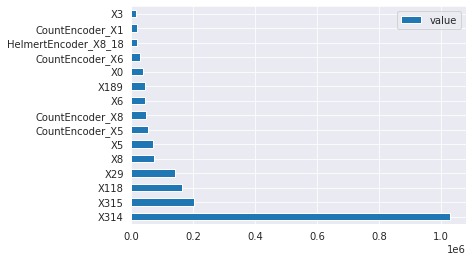

In [17]:
feature_importance = model.get_feature_importance(X_train)
feature_importance.sort_values(by='value', ascending=False)[:15].plot(kind='barh');

In [18]:
predicts = model.predict(X_valid)
print('Valid R2: ', round(sklearn.metrics.r2_score(y_valid, predicts), 4))

Valid R2:  0.5115


## 5. Model optimizing

In [19]:
history = model.opt(
            X_train, y_train,
            metric=sklearn.metrics.r2_score, # log_loss
            timeout=600, # sec
            auto_parameters=False, # try to set the rules ourselves
            folds=10,
            score_folds=3, # put 3 folds
            cold_start=50, # I plan > 200 iterations. 50 iterations are enough to evaluate the space
            opt_lvl=3,
            early_stoping=100, # stop otimization if no better parameters are found through iterations
            verbose=3,)

12:29:43 | regression optimize: maximize
12:29:43 | ##################################################
12:29:43 | > Step 1: calc parameters and pruned score: get test 10 trials
12:30:28 |  One iteration ~ 4.5 sec
12:30:28 |  Possible iters ~ 134.0
12:30:28 | --------------------------------------------------
12:30:28 |   Pruned Threshold Score: 0.55
12:30:28 | ##################################################
12:30:28 | > Step 2: Full opt with Threshold Score Pruner
12:30:28 | ##################################################
12:30:28 | > Start optimization with the parameters:
12:30:28 | CV_Folds = 10
12:30:28 | Score_CV_Folds = 3
12:30:28 | Feature_Selection = False
12:30:28 | Opt_lvl = 3
12:30:28 | Cold_start = 50
12:30:28 | Early_stoping = 100
12:30:28 | Metric = r2_score
12:30:28 | Direction = maximize
12:30:28 | ##################################################
Optimize: : 250it [08:25,  2.02s/it, | Model: LightGBM | OptScore: 0.6186 | Best r2_score: 0.625 ]
12:38:53 | 
 Early

In [20]:
model.fit(X_train, y_train)
predicts = model.predict(X_valid)
print('Valid R2: ', round(sklearn.metrics.r2_score(y_valid, predicts), 4))
# Valid R2:  0.5929

Valid R2:  0.5929


In [21]:
model.plot_opt_history()

In [22]:
model.plot_opt_param_importances()

## 6. Full Save & Load

### 6.1 Save

In [23]:
de.save('de_model_1',)

12:39:07 | Save DataPrepare


In [24]:
model.save('model_1',)

In [25]:
model.model_param

{'random_seed': 42,
 'num_iterations': 400,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'regression',
 'num_leaves': 6,
 'learning_rate': 0.017108218948092564,
 'min_child_samples': 26,
 'bagging_fraction': 0.7000000000000001,
 'feature_fraction': 1.0,
 'bagging_freq': 9}

In [26]:
predicts = model.predict(X_valid)
print('Valid R2: ', round(sklearn.metrics.r2_score(y_valid, predicts), 4))

Valid R2:  0.5929


### 6.2 Load

In [28]:
de_new = DataPrepare(random_state=RANDOM_SEED, verbose=0)
de_new = de_new.load('de_model_1',)

model_new = LightGBM(type_of_estimator='regression', random_state=RANDOM_SEED,)
model_new = model_new.load('model_1',)

X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop('y', axis=1), train['y'], test_size=0.2, random_state=RANDOM_SEED,
)
X_valid = de_new.transform(X_valid)
predicts = model_new.predict(X_valid)
print('Valid R2: ', round(sklearn.metrics.r2_score(y_valid, predicts), 4))

12:43:50 | ##################################################
12:43:50 | ! Start Transform Data
12:43:50 | > Clean Binary Features
12:43:50 | > Clean Categorical Features
12:43:50 | > Transform Categorical Features.
12:43:50 |  - Encoder: HelmertEncoder ADD features: 98
12:43:50 |  - Encoder: CountEncoder ADD features: 6
12:43:50 | ##################################################
12:43:50 | Final data shape: (842, 467)
12:43:50 | Total ADD columns: 91
12:43:50 | ##################################################


Valid R2:  0.5929


In [29]:
model_new.model_param

{'random_seed': 42,
 'num_iterations': 400,
 'verbose': -1,
 'device_type': 'cpu',
 'objective': 'regression',
 'num_leaves': 6,
 'learning_rate': 0.017108218948092564,
 'min_child_samples': 26,
 'bagging_fraction': 0.7000000000000001,
 'feature_fraction': 1.0,
 'bagging_freq': 9}

## 7. Final prediction

In [30]:
X_test = de_new.transform(test)

12:43:58 | ##################################################
12:43:58 | ! Start Transform Data
12:43:58 | > Clean Binary Features
12:43:58 | > Clean Categorical Features
12:43:58 | > Transform Categorical Features.
12:43:58 |  - Encoder: HelmertEncoder ADD features: 98
12:43:58 |  - Encoder: CountEncoder ADD features: 6
12:43:58 | ##################################################
12:43:58 | Final data shape: (4209, 467)
12:43:58 | Total ADD columns: 91
12:43:58 | ##################################################


In [31]:
predicts = model_new.predict(X_test)

In [32]:
sample_submission.loc[:, 'y'] = predicts
sample_submission.tail(2)

,ID,y
4207,8414,109.529819
4208,8416,92.486012


In [33]:
sample_submission.to_csv('submission_v1.csv', index=False)
# Score: 0.55078 Private score: 0.5451